In [4]:

'''
No need to run this file, learner should be exported to export.pkl.
But maybe good to check on other file systems I suppose?

Adapted from fast.ai course.
'''
import os
import ssl
import fastai
from fastcore.all import *
from fastai.data.all import *
from fastai.vision.all import *

In [5]:
types = 'call', 'dislike','fist','four','like','mute','ok','one','palm','peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted', 'relaxed'

set_seed(42)

path = '/Users/brianna/Documents/2024/Semester 1/CSSE4011/Project/project_repo/CSSE4011/training_images/'
files = get_image_files(path)

(78, 78)


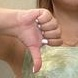

In [11]:
img = PILImage.create(files[100])
print(img.size)
img.to_thumb(128)

In [12]:
from fastcore.parallel import *

def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

(106, 106)    214
(88, 88)      195
(98, 98)      188
(96, 96)      187
(86, 86)      182
             ... 
(233, 272)      1
(269, 356)      1
(199, 214)      1
(167, 186)      1
(159, 194)      1
Name: count, Length: 345, dtype: int64

In [19]:
# dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42,
#     item_tfms=Resize(128, method='squish'),
#     batch_tfms=aug_transforms(size=128, min_scale=0.75))

db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128, method='squish')],
)

# tfms = aug_transforms(max_rotate=20, max_zoom=1.5, max_lighting=0.5, max_warp=0.4, p_affine=1., p_lighting=1.)

# dls = db.dataloaders(path=path, bs=64, batch_tfms=[*tfms, Normalize.from_stats(*imagenet_stats)])

# dls.show_batch(max_n=3, figsize=(8,6))
# # .dataloaders(path, bs=64)

In [22]:
tfms = aug_transforms()
dls = db.dataloaders(path, path=path, bs=64, batch_tfms=[*tfms, Normalize.from_stats(*imagenet_stats)])
 

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5, 0.025)

epoch,train_loss,valid_loss,error_rate,time
0,2.822015,1.722024,0.467124,00:57


epoch,train_loss,valid_loss,error_rate,time
0,1.090402,0.599044,0.173242,01:12
1,0.430739,0.408743,0.099485,01:12
2,0.165582,0.377046,0.094911,01:13
